In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

# Data cleaning and Pre-processing 

In [29]:
#header creation and directory paths

usage_dir = "task_usage/"
job_dir = "job_events/"

task_usage_header = ['start_time','end_time','job_id','task_index','machine_id', 'mean_cpu_usage',
                     'canon_memory_usage', 'assign_memory_usage', 'unmapped_cache', 'total_cache', 
                     'max_mem', 'mean_io', 'mean_space', 'max_cpu', 'max_io', 'cpi', 'mai', 'sample',
                     'agg_type', 'sample_cpu_usage']

job_header = ['timestamp','missing_info', 'job_id', 'event_type', 'user_name', 'scheduling_class',
              'job_name','logical_job_name']

In [30]:
#read csv - drop unused columns

final_df = pd.DataFrame()

# 3 files used for each category
for i in range(10):
    file_str = str(i).zfill(5)
    usage_df = pd.read_csv(usage_dir +"part-"+file_str+"-of-00500.csv.gz",header=None)
    usage_df.columns = task_usage_header

    job_df = pd.read_csv(job_dir +"part-"+file_str+"-of-00500.csv.gz",header=None)
    job_df.columns = job_header

    job_df.drop(['missing_info','user_name', 'scheduling_class',
                  'job_name','logical_job_name'], axis =1,inplace=True)

    usage_df.drop(['task_index','machine_id','canon_memory_usage', 'assign_memory_usage', 'unmapped_cache', 'total_cache', 
                         'max_mem', 'mean_space', 'max_cpu', 'max_io', 'cpi', 'mai', 'sample',
                         'agg_type', 'sample_cpu_usage','mean_cpu_usage'], axis =1,inplace=True)

    #merge to filter jobs with valid life - SCHEDULE to FINISH

    new_jobdf = pd.merge(job_df[(job_df['event_type'] == 1)],job_df[ (job_df['event_type'] == 4)], on = "job_id")
    new_jobdf.drop(['event_type_x',  'event_type_y'], axis =1,inplace=True)
    new_jobdf['life_time'] = new_jobdf['timestamp_y'] -  new_jobdf['timestamp_x']
    new_jobdf.drop(['timestamp_x',  'timestamp_y'], axis =1,inplace=True)
    #new_jobdf
    
    
    #merge to get cpu usage of jobs with valid lifetime

    n_jobdf = pd.merge(usage_df,new_jobdf, on = "job_id")
    n_jobdf['start_time'] = (n_jobdf['start_time']/1000000)
    n_jobdf['end_time'] = (n_jobdf['end_time']/1000000)
    n_jobdf['life_time'] = (n_jobdf['life_time']/1000000)

    # arrange cpu uses by jobs- add parallel cpu uses of all tasks of a jobs during a time cycle
    
    final_df = final_df.append(n_jobdf.groupby(['job_id','start_time','end_time']).sum())
final_df


mean_io    life_time
job_id     start_time end_time                       
6245463804 600.0      900.0     0.000002  3452.681356
           900.0      1200.0    0.000002  3452.681356
           1200.0     1500.0    0.000002  3452.681356
           1500.0     1800.0    0.000007  3452.681356
           1800.0     2100.0    0.000002  3452.681356
           2100.0     2400.0    0.000002  3452.681356
           2400.0     2700.0    0.000004  3452.681356
           2700.0     3000.0    0.000002  3452.681356
           3000.0     3300.0    0.001120  3452.681356
           3300.0     3442.0    0.000143  3452.681356
           3442.0     3456.0    0.000209  3452.681356
           3456.0     3457.0    0.000000  3452.681356
6248941479 600.0      900.0     0.000002  4219.709190
           900.0      1200.0    0.000002  4219.709190
           1200.0     1500.0    0.000002  4219.709190
           1500.0     1800.0    0.000002  4219.709190
           1800.0     2100.0    0.000002  4219.709190
           2100.0     2400.0    0.000002  4219.709190
           2400.0     2700.0    0.000013  4219.709190
           2700.0     3000.0    0.000002  4219.709190
           3000.0     3300.0    0.000003  4219.709190
           3300.0     3600.0    0.000008  4219.709190
           3600.0     3900.0    0.000005  4219.709190
           3900.0     4200.0    0.000028  4219.709190
           4200.0     4206.0    0.014430  4219.709190
           4206.0     4221.0    0.000000  4219.709190
           4221.0     4223.0    0.000000  4219.709190
6248963537 600.0      900.0     0.000021  4192.771235
           900.0      1200.0    0.000011  4192.771235
           1200.0     1500.0    0.000031  4192.771235
...                                  ...          ...
6254910828 50620.0    50621.0   0.000000    80.890835
6254910930 50617.0    50670.0   0.004074    74.178339
           50670.0    50687.0   0.000009    74.178339
           50687.0    50688.0   0.000000    74.178339
           50688.0    50700.0   0.000000    74.178339
6254910932 50566.0    50595.0   0.015690    58.910019
           50595.0    50614.0   0.000120    58.910019
           50614.0    50615.0   0.000000    58.910019
6254910934 50630.0    50671.0   0.003365    68.970759
           50671.0    50681.0   0.000007    68.970759
           50681.0    50683.0   0.000000    68.970759
6254910965 50570.0    50609.0   0.001324    72.208403
           50609.0    50627.0   0.000000    72.208403
           50627.0    50628.0   0.000000    72.208403
6254913074 50592.0    50594.0   0.000143    40.962566
           50594.0    50613.0   0.000000    40.962566
           50613.0    50615.0   0.000000    40.962566
6254913319 50590.0    50592.0   0.000000    31.842594
           50592.0    50613.0   0.000000    31.842594
           50613.0    50614.0   0.000000    31.842594
6254923557 50658.0    50659.0   0.001429    27.445138
           50659.0    50674.0   0.000091    27.445138
           50674.0    50675.0   0.000000    27.445138
6254923706 50662.0    50663.0   0.001715    28.078684
           50663.0    50679.0   0.000005    28.078684
           50679.0    50680.0   0.000000    28.078684
6254925413 50687.0    50688.0   0.000000    27.279889
           50688.0    50700.0   0.000000    27.279889
           50700.0    50705.0   0.000000    27.279889
           50705.0    50706.0   0.000000    27.279889

[36840 rows x 2 columns]

In [31]:
final_df.reset_index(level='start_time',inplace=True)
final_df.reset_index(level='end_time',inplace=True)

# Data normalization and Binning

In [32]:
#normalising the mean cpu usage - y axis
# print(final_df.index.get_level_values(0).unique())
# for i in final_df.index.get_level_values(0).unique():


for i in final_df.index.get_level_values(0).unique():
    minn = final_df.loc[i]['mean_io'].min()
    maxx = final_df.loc[i]['mean_io'].max() 
    # print(minn,maxx)
    small_df = final_df[final_df.index == i]
    small_df['mean_io'] = (small_df['mean_io'] - minn)/(maxx-minn)
    final_df[final_df.index == i] = small_df
final_df

/Users/banani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,end_time,start_time,mean_io,life_time
job_id,,,,
6245463804,900.0,600.0,0.001703,3452.681356
6245463804,1200.0,900.0,0.001703,3452.681356
6245463804,1500.0,1200.0,0.001703,3452.681356
6245463804,1800.0,1500.0,0.005961,3452.681356
6245463804,2100.0,1800.0,0.001703,3452.681356
6245463804,2400.0,2100.0,0.001703,3452.681356
6245463804,2700.0,2400.0,0.003406,3452.681356
6245463804,3000.0,2700.0,0.001703,3452.681356
6245463804,3300.0,3000.0,1.000000,3452.681356


# Sample Distribution Plots

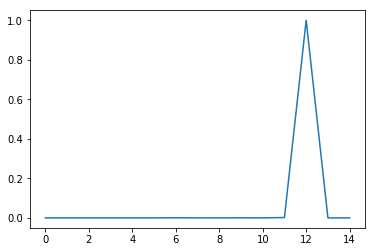

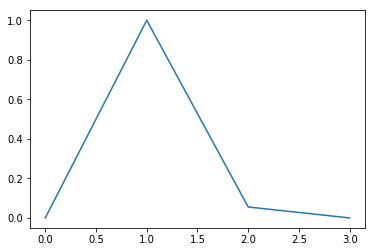

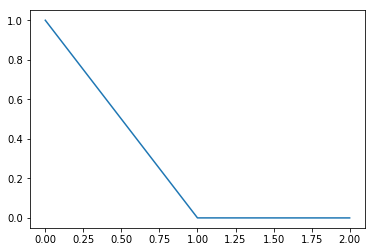

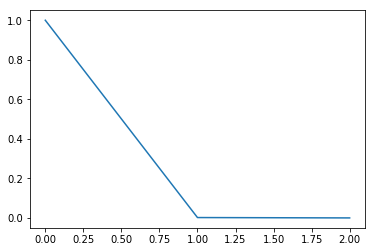

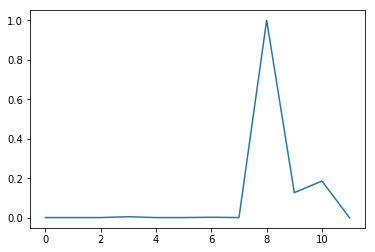

In [33]:
#5 plots of random jobs and their cpu usages

small_df = final_df[final_df.index == 6248941479]
colVals = small_df['mean_io'].tolist()
plt.plot(colVals)
plt.show()

small_df = final_df[final_df.index == 6252015953]
colVals = small_df['mean_io'].tolist()
plt.plot(colVals)
plt.show()

small_df = final_df[final_df.index == 6252014624]
colVals = small_df['mean_io'].tolist()
plt.plot(colVals)
plt.show()

small_df = final_df[final_df.index == 6252018909]
colVals = small_df['mean_io'].tolist()
plt.plot(colVals)
plt.show()

small_df = final_df[final_df.index == 6245463804]
colVals = small_df['mean_io'].tolist()
plt.plot(colVals)
plt.show()


In [34]:
#function to calculate values in each bin of each job's cpu uasge distribution

def calc_point(x1,y1,x2,y2,point):
    y=(point-x1)*(y2-y1)/(x2-x1)+y1
    if math.isnan(y):
        return -1000
    return y
def calculateValues(dataframe):
    my_points=[]
    start_index = 0
    next_index=1
    row0 = dataframe.iloc[start_index]
    row1 = dataframe.iloc[next_index]
    point = row0.end_time
    x1= row0.end_time
    x2= row1.end_time
    y1= row0.mean_io
    y2= row1.mean_io
    end_point = dataframe.iloc[dataframe.shape[0]-1].end_time
    my_points.append(y1)
#     print(point)
#     print(end_point)
    bin_size = (end_point-point)/100
#     print(bin_size)
    for i in range(100):
        point = point + bin_size
        if point > x2:
            start_index += 1
            next_index += 1
            if next_index >= dataframe.shape[0]:
                return my_points
            row0 = dataframe.iloc[start_index]
            row1 = dataframe.iloc[next_index]
            point = row0.end_time
            x1= row0.end_time
            x2= row1.end_time
            y1= row0.mean_io
            y2= row1.mean_io
#         print(point)
        val = calc_point(x1,y1,x2,y2,point)
        if val == -1000:
            return [-1000]
        my_points.append(val)
#     print(len(my_points))
    my_points.append(0)
    return my_points

In [35]:
#divide each lifetime into 100 bins
#get vector of all job's common usage distribution

# dummy = final_df.reset_index(level='start_time')
# dummy.reset_index(level='end_time',inplace=True)

dummy = final_df

job_ids = dummy.index.get_level_values(0).unique()
count = len(job_ids)
# job_ids
prev_point = [0]*102
for job_id in job_ids:
    #print(job_id)
    small_df = dummy[dummy.index == job_id]
    if small_df.shape[0] > 10:
        ponts = calculateValues(small_df)
#         print(ponts)
        if ponts[0] != -1000:
            prev_point = [x + y for x, y in zip(prev_point, ponts)]
#         print(len(prev_point))
#     print(small_df)
#final_df.index.unique().shape[0]
newList = [x / count for x in prev_point]

/Users/banani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


# Hypothesis testing- KS Test

In [36]:
#vector of mean of all the distribution - 100 values
newList

[0.0025346864889874954,
 0.005597864633329651,
 0.0071854038955811664,
 0.008110851654990188,
 0.00850470201158105,
 0.008672697819424438,
 0.00880264578091267,
 0.008808331593665078,
 0.008349563645966831,
 0.007801916748160214,
 0.007326560088150089,
 0.006999001607700105,
 0.006708034790292284,
 0.006222024112510949,
 0.005686621963199815,
 0.005371545168885423,
 0.005076525094933024,
 0.004738351689568024,
 0.004315022707689631,
 0.003761938235110672,
 0.0034207897215882167,
 0.003109791457318706,
 0.0026632793164536508,
 0.0024004232141558147,
 0.002137598180041193,
 0.0019612711497473977,
 0.001811922178500277,
 0.0016658686491377772,
 0.0015109605989636218,
 0.001375273763653817,
 0.0012668849050334991,
 0.0012160621945283387,
 0.001216032464982425,
 0.0012421825293150923,
 0.0014276668124713152,
 0.0012520043567847941,
 0.0011034813803268908,
 0.0011907742066127568,
 0.0012004261144964105,
 0.001218054048655921,
 0.0012304618716927678,
 0.001250059646906364,
 0.0012767630913077

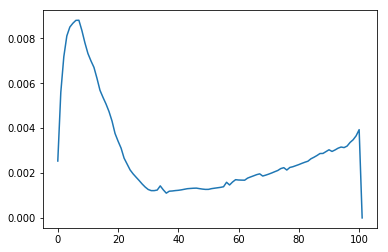

In [37]:
#plot graph of mean usage distribution

plt.plot(newList)
plt.show()

In [38]:
#K_S test to see if this vector comes from a normal distribution

#print(newList)
val =stats.kstest(newList, 'norm')
val

KstestResult(statistic=0.5, pvalue=0.0)

# CPU Usage vs Memory Usage

In [56]:
vec = [
 0.00288779702122919,
 0.005596395511027189,
 0.007109756362602586,
 0.007904303157385086,
 0.008370133783137676,
 0.008715513494472145,
 0.00901815706142132,
 0.009267601921668709,
 0.00928129130841654,
 0.009167148410525027,
 0.00914782965371047,
 0.009122542837955215,
 0.009033477116970978,
 0.008989937470547497,
 0.008891818338595127,
 0.008889171762098443,
 0.008719921223039297,
 0.008660839268592065,
 0.008550833875437903,
 0.008400017068185864,
 0.008316051802016193,
 0.008302328221040411,
 0.008315158061115737,
 0.008236233595626327,
 0.007979302945706025,
 0.007951940700033282,
 0.007961888285562706,
 0.007972221957271439,
 0.007799357489286218,
 0.007834725140633313,
 0.007819445292123143,
 0.007852894506514689,
 0.007896859510335658,
 0.007963216256408412,
 0.008038608207603019,
 0.007973301974670353,
 0.007939072597725848,
 0.007925164283389616,
 0.007950258789998879,
 0.007966488168376987,
 0.007868527257779987,
 0.007823584272416981,
 0.007846192963154234,
 0.007846349400621974,
 0.007832358982908587,
 0.007867479139790082,
 0.00796056358126962,
 0.007914507910964229,
 0.007871067081395285,
 0.007914191221895015,
 0.007884779005661674,
 0.007851723432361913,
 0.007904074469508315,
 0.007946207490257201,
 0.007970052729375345,
 0.008017096429996286,
 0.00795587981417692,
 0.007983882672092584,
 0.007905701704291116,
 0.007959766428421567,
 0.008003510785873922,
 0.008069251482859084,
 0.008150859004442311,
 0.0082724202788066,
 0.008365969033577815,
 0.008459632021466622,
 0.008519422098697051,
 0.008581874375203738,
 0.008550425036386013,
 0.008614677273235333,
 0.008683105942047497,
 0.008748728559754428,
 0.008812439516976444,
 0.008872683294884347,
 0.008966934662131415,
 0.009062093894620874,
 0.009076729263820329,
 0.009207200693039434,
 0.009291914541894401,
 0.009388217225153506,
 0.009470003461903635,
 0.00964491278937629,
 0.009615354122977215,
 0.009569882194730305,
 0.009671819293097846,
 0.009750671650865177,
 0.009747327694599734,
 0.009825425115497126,
 0.00977082006940664,
 0.009835520214930208,
 0.009890720427888928,
 0.00984354615170759,
 0.009914147666411575,
 0.009978303772136701,
 0.010029168062451525,
 0.009947077405642775,
 0.009940581110775159,
 0.010048835144291439,
 0.010055308438924817,
 0.010045559230426309,
 0.01002859527035294,
 0.0]

In [ ]:
vec

In [61]:
val =stats.ks_2samp(vec, newList)

In [62]:
val

Ks_2sampResult(statistic=0.8921568627450981, pvalue=4.92692760536236e-37)